# Capstone Project - Battle of the Neighborhoods in Hyderabad
### Applied Data Science Capstone offered  by IBM/Coursera, project created by **Sandeep Kumar Vengala**

## Table of contents
* [Introduction: Business Problem](#introduction)
* [Data](#data)
* [Methodology](#methodology)
* [Analysis](#analysis)
* [Results and Discussion](#results)
* [Conclusion](#conclusion)

## Introduction: Business Problem <a name="introduction"></a>

In this project we will try to find an optimal location for opening a restaurant. Specifically, this report will be targeted to stakeholders interested in opening any **food-joint/restaurant** in **Hyderabad**, Telangana, India.

Since there are lots of restaurants in Hyderabad we will try to detect **locations that are not already crowded with restaurants**. We are also particularly interested in **neighborhoods which are similar to the best neighborhoods in terms of amenities**. We would also prefer locations **as close to city center as possible**, assuming that first two conditions are met.

We will use our data science technical expertise to generate a few most promising neighborhoods based on this criteria. Advantages of each area will then be clearly expressed so that best possible final location can be chosen by stakeholders.

## Data <a name="data"></a>

Based on definition of our problem, factors that will influence our decision are:
* number of existing restaurants in the neighborhood (any type of restaurant)
* variety of restaurants in the neighborhood, if any
* distance of neighborhood from city center

Neighborhoods have been defined based on names of post offices as given in the form of a table in the website : http://pincode.india-server.com/cities/hyderabad/  

Following data sources will be needed to extract/generate the required information:
* names of all neighborhoods (post office names) will be extracted from the above mentioned website using **Pandas package in python**
* approximate addresses of centers of these neighborhoods will be obtained using **GeoPy Geocoder package in python**
* number of restaurants and their type and location in every neighborhood will be obtained using **Foursquare API**

## Methodology <a name="methodology"></a>
In the cells below the following format of the project will be followed in order to explore the **neighborhoods in Hyderabad** and try to analyse and suggest an optimal location for opening a food-joint/restaurant.
1. Get list of all neighborhoods from the website listing **names of postal offices** all over Hyderabad. 
2. Obtain **latitudes and longitudes** for all these neighborhoods.
3. Check for any **outliers**, i.e. postal office names which aren't within 25Kms from the centre of Hyderabad and remove these data points.
4. Send **GET requests to Foursquare API** to get list of venues (maximum 100) within the vicinity of all neighbrhoods (vicinity is defined within a radium of 1000m from the neighborhood).  
5. Remove all neighborhoods which do not have more than 20 venues in their vicinities since there isn't enough data for accurate clustering using K-Means Clustering.
6. **One-hot encode** the data and feed the dataframe to K-Means clustering Algorithm to form 10 clusters from the list of available neighborhoods.
7. Create visualizations using the cluster number of all neighborhoods to better understand the data create valuable insights. Here, we try to find out the best neighborhoods amongst the available list of neighborhoods and try to identify it's cluster.
8. Again send **GET requests to Foursquare API** to get list of venues (maximum 100) of **'section = food'** to obtain only venues related to food joints within the vicinity of all selected neighborhoods (vicinity is defined within a radius of 1000m from the neighborhood). 
9. Create visualizations to find out which neighborhoods have maximum food joints and which ones have maximum types of food joints.
10. Suggest optimal locations for opening a restaurant based on all the statistical analysis done.

### Import all required packages

In [2]:
import pandas as pd
import numpy as np
from geopy.geocoders import Nominatim
import folium
import requests
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
table1 = pd.read_html('http://pincode.india-server.com/cities/hyderabad/')

In [4]:
table = pd.DataFrame()
table = table1[1]

In [5]:
table = table.drop(['List of all Hyderabad post offices with pincode'],axis=1)

In [72]:
table1[1]

,List of all Hyderabad post offices with pincode,Unnamed: 1_level_0,Unnamed: 2_level_0,Unnamed: 3_level_0
,S.No.,Post office,Office type,Pincode
0,1.0,A.Gs Office,S.O,500004
1,2.0,A.Gs. Staff Quarters,S.O,500045
2,3.0,Administrative Buildings,S.O,500007
3,4.0,Airforce Academy,S.O,500043
4,5.0,Aliabad,B.O,500101
5,6.0,Allampalli .,S.O,501102
6,7.0,Alwal,S.O,500010
7,8.0,Ambernagar,B.O,500044
8,9.0,Amberpet,S.O,500013


In [7]:
table = pd.DataFrame()

In [8]:
table['Neighborhood_Names'] = table1[1][('Unnamed: 1_level_0', 'Post office')]

In [13]:
table

,Neighborhood_Names
0,A.Gs Office
1,A.Gs. Staff Quarters
2,Administrative Buildings
3,Airforce Academy
4,Aliabad
5,Allampalli .
6,Alwal
7,Ambernagar
8,Amberpet
9,Anandbagh


In [14]:
table = table['Neighborhood_Names'].values.tolist()
table

['A.Gs Office',
 'A.Gs. Staff Quarters',
 'Administrative Buildings',
 'Airforce Academy',
 'Aliabad',
 'Allampalli .',
 'Alwal',
 'Ambernagar',
 'Amberpet',
 'Anandbagh',
 'Anandnagar',
 'Anantaram',
 'Andhra Mahila Sabha',
 'Ankireddipalli',
 'Ankushapur',
 'Aoc Records',
 'AP Police Academy PO',
 'Aphb Colony Moulali',
 'Ashoknagar',
 'Badangpet',
 'Bahadurpalli',
 'Bahadurpura',
 'Balanagar Township',
 'Banjara Hills',
 'Barkatpura',
 'Bazarghat',
 'Begumbazar',
 'Begumpet Policelines',
 'Begumpet',
 'Bhaskar Nagar',
 'BITS',
 'Boduppal',
 'Bogaram',
 'Bolarum Bazar',
 'Bolarum',
 'Bowenpally',
 'C.B.I.T',
 'Central Secretariat',
 'Chandanagar',
 'Cherial',
 'Cherlapalli',
 'CIE Balangar',
 'Crp Camp',
 'CRPF',
 'CUC',
 'Cyberabad',
 'Dabirpur',
 'Dargah Hussain Shahwali',
 'Darushifa',
 'Don Bosco Nagar',
 'Dr As Rao Nagar',
 'Dr.B R Ambedkar O.U',
 'Ecil',
 'EME Records',
 'Erragadda',
 'Falaknuma',
 'Fatehdarwaza',
 'Film Nagar',
 'Gagan Mahal',
 'Gajularamaram',
 'Gandhi Bhawan

Create a dataframe consisting of 3 columns - **name**, **latitude** and **longitude** for each and every neighborhood:

In [15]:
df = pd.DataFrame(columns=['name','latitude','longitude'])
df

,name,latitude,longitude


Use **GeoPy** to obtain **gps coordinates** for every neighborhood:

In [16]:
!pip install geopy
from geopy.geocoders import Nominatim

You should consider upgrading via the 'python -m pip install --upgrade pip' command.


In [17]:
for x in table:
    try:
        address = x + ', Telangana, India'
        geolocator = Nominatim(user_agent="hyderabad_explorer")
        location = geolocator.geocode(address)
        latitude = location.latitude
        longitude = location.longitude
        df = df.append({'name':x,'latitude':latitude,'longitude':longitude},ignore_index=True)
    except:
        print('EXCEPTION!! No coordinates found for :'+address)

EXCEPTION!! No coordinates found for :A.Gs Office, Telangana, India
EXCEPTION!! No coordinates found for :A.Gs. Staff Quarters, Telangana, India
EXCEPTION!! No coordinates found for :Administrative Buildings, Telangana, India
EXCEPTION!! No coordinates found for :Airforce Academy, Telangana, India
EXCEPTION!! No coordinates found for :Allampalli ., Telangana, India
EXCEPTION!! No coordinates found for :Ambernagar, Telangana, India
EXCEPTION!! No coordinates found for :Amberpet, Telangana, India
EXCEPTION!! No coordinates found for :Anandbagh, Telangana, India
EXCEPTION!! No coordinates found for :Anandnagar, Telangana, India
EXCEPTION!! No coordinates found for :Anantaram, Telangana, India
EXCEPTION!! No coordinates found for :Andhra Mahila Sabha, Telangana, India
EXCEPTION!! No coordinates found for :Ankireddipalli, Telangana, India
EXCEPTION!! No coordinates found for :Aoc Records, Telangana, India
EXCEPTION!! No coordinates found for :AP Police Academy PO, Telangana, India
EXCEPTION

In [18]:
df

,name,latitude,longitude
0,Aliabad,17.345630,78.472680
1,Alwal,17.502229,78.508858
2,Ankushapur,18.833897,79.668823
3,Ashoknagar,17.952459,79.949425
4,Badangpet,17.322375,78.528034
5,Bahadurpura,17.357067,78.454542
6,Balanagar Township,17.465711,78.449525
7,Banjara Hills,17.417746,78.439901
8,Barkatpura,17.392612,78.496968
9,Bazarghat,17.402787,78.460449


### Plot all neighborhoods as circle markers onto the map of **Hyderabad**

In [75]:
# create map of Hyderabad using latitude and longitude values
map_hyderabad = folium.Map(location=[17.385000, 78.486700], zoom_start=6)

# add markers to map
for lat,lng,label in zip(df['latitude'],df['longitude'],df['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hyderabad)  

    folium.Circle(
        [17.303341,78.4026362],
        radius=26000,
        popup='Relevant Areas of Hyderabad',
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.005,
        parse_html=False).add_to(map_hyderabad)     
    
map_hyderabad

#### Shade areas under which we want to search for neighborhoods in red in the above map. 
Areas relevant to us are those which are within a 25Km radius from the centre of Hyderabad

In [23]:
# create map of Hyderabad using latitude and longitude values
map_hyderabad = folium.Map(location=[17.2509521,78.320236], zoom_start=10)

# add markers to map
for lat,lng,label in zip(df['latitude'],df['longitude'],df['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hyderabad)  

    folium.Circle(
        [17.303341,78.4026362],
        radius=25500,
        popup='Relevant Areas of Hyderabad',
        color='black',
        fill=True,
        fill_color='red',
        fill_opacity=0.005,
        parse_html=False).add_to(map_hyderabad)     
    
map_hyderabad

Calculate distance of all neighborhoods from the centre of Hyderabad and add them to the dataframe **'df'**

In [25]:
from geopy.distance import distance
centre = (17.303341,78.4026362)
l = []
for x in range(df.shape[0]):
    lat = df.iloc[x]['latitude']
    lng = df.iloc[x]['longitude']
    l.append(distance(centre,(lat,lng)).km)

In [26]:
df['dist_from_centre']=l

In [27]:
df.sort_values(['dist_from_centre'],inplace = True)
df.reset_index(inplace = True,drop = True)

In [28]:
df.tail()

,name,latitude,longitude,dist_from_centre
123,Jawahar Nagar,18.215156,80.024639,199.425988
124,Ankushapur,18.833897,79.668823,216.018155
125,Nutankal,17.202783,80.481759,221.376637
126,Mamidipalli,19.120973,79.752535,246.698340
127,Suraram,17.634565,80.716646,248.504964


##### Filter out neighborhoods which are more than 25Kms away from the centre of the city

In [29]:
df_final = df[df['dist_from_centre']<=25]

In [30]:
df_final

,name,latitude,longitude,dist_from_centre
0,Hydershahkote,17.357552,78.395056,6.053577
1,Rajendranagar (K.V.Rangareddy),17.361597,78.427675,6.975046
2,Falaknuma,17.331841,78.465849,7.423260
3,Kishanbagh,17.360833,78.442748,7.659282
4,CRPF,17.318871,78.475286,7.912198
5,Bahadurpura,17.357067,78.454542,8.111570
6,Karwan Sahu,17.373489,78.441210,8.779740
7,Aliabad,17.345630,78.472680,8.794500
8,Golconda,17.383507,78.401141,8.873587
9,Kulsumpura,17.373727,78.445194,9.008066


##### Plot final map with only relevant neighborhoods

In [31]:
# create map of Hyderabad using latitude and longitude values
map_hyderabad = folium.Map(location=[17.303341,78.4026362], zoom_start=10)

# add markers to map
for lat,lng,label in zip(df_final['latitude'],df_final['longitude'],df_final['name']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_hyderabad)  

map_hyderabad

#### Foursquare API
Print Foursquare API Credentials:

In [32]:
CLIENT_ID = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare ID
CLIENT_SECRET = 'XXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXXX' # your Foursquare Secret
VERSION = '20201104' # Foursquare API version

Define function to request Foursquare API to return **100 nearest venues (within a 1000m radius)** from given neighborhood's latitude and longitude:

In [33]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call function and create dataframe to store all relevant data from Foursqaure API's response pertaining to venues near a neighborhood for each and every neighborhood

In [34]:
hyderabad_venues = getNearbyVenues(names=df_final['name'],
                                   latitudes=df_final['latitude'],
                                   longitudes=df_final['longitude']
                                  )

Hydershahkote
Rajendranagar (K.V.Rangareddy)
Falaknuma
Kishanbagh
CRPF
Bahadurpura
Karwan Sahu
Aliabad
Golconda
Kulsumpura
Murad Nagar
Uppuguda
Moghalpura
Mangalhat
High Court
Kanchanbagh
Yakutpura
Sakkubai Nagar
Manikonda
Vijay Nagar Colony
Film Nagar
Sahifa
Bazarghat
Old Malakpet
Nimboliadda
Banjara Hills
Ibrahim Bagh Lines
Saidabad
Malakpet Colony
Badangpet
New Mla Quarters
Khairatabad
Central Secretariat
Hyderguda
Stn Kachiguda
Narayanguda
Himayathnagar
Dr.B R Ambedkar O.U
Gayatri Nagar
Manuu
Barkatpura
Jubilee Hills
Hyderabad Jubilee
Gagan Mahal
Srinagar Colony
Cyberabad
Somajiguda
Nanakramguda
Yousufguda
Madhapur
New Nallakunta
Vengal Rao Nagar
Zamistanpur
Musheerabad (ND)
Erragadda
Hyderabad Public School
Ramakrishna Puram
Samskruthi
Begumpet
Saroornagar
State Bank Of Hyderabad
Padmaraonagar
Sitaphalmandi
Balanagar Township
Gsi(Sr) Bandlaguda
Rail Nilayam
Kakatiya Nagar
Picket
Hal
Lallaguda
Ngri
IICT
Tarnaka
Hanumanpet
Bowenpally
Malkajgiri
Kukatpally
Vivekananda Nagar Colony
Ch

In order for **efficient clustering**, we need a minimum of 10 venues for each neighborhood because otherwise there isn't sfficient data for making any accurate analysis. Thus we obtain names of neighborhoods with more than 10 venues in their vicininty:

In [37]:
temp = hyderabad_venues.groupby('Neighborhood').count().sort_values(['Venue'])[hyderabad_venues.groupby('Neighborhood').count().sort_values(['Venue'])['Venue']>=10]
temp.reset_index(inplace = True)

In [38]:
temp

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aliabad,10,10,10,10,10,10
1,Yousufguda,10,10,10,10,10,10
2,Vengal Rao Nagar,10,10,10,10,10,10
3,Moghalpura,10,10,10,10,10,10
4,Malkajgiri,11,11,11,11,11,11
5,Picket,11,11,11,11,11,11
6,Nimboliadda,12,12,12,12,12,12
7,Vivekananda Nagar Colony,12,12,12,12,12,12
8,Rail Nilayam,12,12,12,12,12,12
9,High Court,12,12,12,12,12,12


Create list **final_names** to store names of all neighborhoods with more than 10 venues in their vicinity: 

In [41]:
final_names = temp['Neighborhood'].tolist()

Create dataframe **final_hyderabad_venues** to store data pertaining to only those neighborhoods which have more than 10 venues in their vicinity: 

In [43]:
final_hyderabad_venues = pd.DataFrame()
for x in range(hyderabad_venues.shape[0]):
    if(hyderabad_venues.iloc[x]['Neighborhood'] in final_names):
        final_hyderabad_venues = final_hyderabad_venues.append(hyderabad_venues.iloc[x])

In [44]:
final_hyderabad_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Category,Venue Latitude,Venue Longitude
25,Aliabad,17.345630,78.472680,Hotel Shah Ghouse,Snack Place,17.347899,78.470986
26,Aliabad,17.345630,78.472680,Star Bawarche,Asian Restaurant,17.347700,78.470613
27,Aliabad,17.345630,78.472680,Scoops Ice Creams & Chat,Ice Cream Shop,17.343173,78.475036
28,Aliabad,17.345630,78.472680,Classic Gym,Gym,17.345489,78.476223
29,Aliabad,17.345630,78.472680,Anand Pan Shop,Smoke Shop,17.343041,78.468887
30,Aliabad,17.345630,78.472680,Kamdhenu Traders,Department Store,17.343593,78.468325
31,Aliabad,17.345630,78.472680,MedPlus,Pharmacy,17.347991,78.477954
32,Aliabad,17.345630,78.472680,Lee's Chinese Restaurant,Chinese Restaurant,17.347883,78.466605
33,Aliabad,17.345630,78.472680,cafe needs,Café,17.345678,78.479279
34,Aliabad,17.345630,78.472680,Volta Pan Shop,Food & Drink Shop,17.350301,78.478755


Sort dataframe alphabetically using neighborhood names: 

In [45]:
final_hyderabad_venues = final_hyderabad_venues.sort_values(['Neighborhood']).reset_index(drop = True)

## K-Means Clustering
First, the dataframe **final_hyderabad_venues** is one-hot encoded to convert all venue categories into categorical variables

In [46]:
# one hot encoding
#del list
hyderabad_onehot = pd.get_dummies(final_hyderabad_venues[['Venue Category']], prefix="", prefix_sep="")
# add neighborhood column back to dataframe
hyderabad_onehot['Neighborhood_Name'] = final_hyderabad_venues['Neighborhood'] 
# move neighborhood column to the first column
fixed_columns = [hyderabad_onehot.columns[-1]] + list(hyderabad_onehot.columns[:-1])
hyderabad_onehot = hyderabad_onehot[fixed_columns]

In [47]:
hyderabad_onehot.head()

,Neighborhood_Name,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Sporting Goods Shop,Sports Bar,Stadium,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Aliabad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,Aliabad,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
2,Aliabad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,Aliabad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,Aliabad,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [48]:
hyderabad_onehot.shape

(1188, 143)

In order to create a dataframe with features which can be fed to the K-Means Clustering algorithm, the onehot-encoded dataframe is grouped into rows pertaining to each neighborhood with the mean values of all the columns:

In [49]:
hyderabad_grouped = hyderabad_onehot.groupby('Neighborhood_Name').mean().reset_index()
hyderabad_grouped = hyderabad_grouped.sort_values(['Neighborhood_Name'])
hyderabad_grouped

,Neighborhood_Name,Accessories Store,Afghan Restaurant,Airport,American Restaurant,Andhra Restaurant,Arcade,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,...,Sporting Goods Shop,Sports Bar,Stadium,Supermarket,Tea Room,Tex-Mex Restaurant,Thai Restaurant,Train Station,Vegetarian / Vegan Restaurant,Women's Store
0,Aliabad,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,Banjara Hills,0.000000,0.000000,0.00,0.017241,0.000000,0.000000,0.000000,0.017241,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.017241,0.000000,0.000000,0.000000
2,Barkatpura,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.058824,0.000000,0.058824
3,Bazarghat,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000
4,Begumpet,0.000000,0.000000,0.05,0.000000,0.000000,0.050000,0.000000,0.050000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.050000,0.000000,0.000000,0.000000
5,Central Secretariat,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.025000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.025000,0.000000
6,Cyberabad,0.000000,0.000000,0.00,0.000000,0.050000,0.000000,0.000000,0.100000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,Dr.B R Ambedkar O.U,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.027778,0.000000,0.000000,...,0.027778,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.027778,0.000000
8,Film Nagar,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.043478,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
9,Gagan Mahal,0.000000,0.000000,0.00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.031250,0.000000,0.031250,0.000000,0.000000,0.000000,0.000000,0.000000,0.031250,0.000000


Sort dataframe alphabetically using neighborhood names: 

In [50]:
df_final = df_final.sort_values(['name']).reset_index(drop = True)
df_final

,name,latitude,longitude,dist_from_centre
0,Aliabad,17.345630,78.472680,8.794500
1,Alwal,17.502229,78.508858,24.736699
2,Badangpet,17.322375,78.528034,13.496194
3,Bahadurpura,17.357067,78.454542,8.111570
4,Balanagar Township,17.465711,78.449525,18.648062
5,Banjara Hills,17.417746,78.439901,13.266589
6,Barkatpura,17.392612,78.496968,14.076201
7,Bazarghat,17.402787,78.460449,12.605049
8,Begumpet,17.444020,78.462482,16.818313
9,Bhaskar Nagar,17.501314,78.512777,24.840019


The dataframe **df_final** is restricted to only those rows which contain neighborhoods with more than 10 venues in their vicinity:

In [54]:
l = []
for x in range(df_final.shape[0]):
    l.append(df_final.iloc[x]['name'] in final_names)

In [55]:
df_final = df_final[l].reset_index(drop = True)
df_final

,name,latitude,longitude,dist_from_centre
0,Aliabad,17.345630,78.472680,8.794500
1,Banjara Hills,17.417746,78.439901,13.266589
2,Barkatpura,17.392612,78.496968,14.076201
3,Bazarghat,17.402787,78.460449,12.605049
4,Begumpet,17.444020,78.462482,16.818313
5,Central Secretariat,17.408266,78.468948,13.583746
6,Cyberabad,17.430929,78.369898,14.542945
7,Dr.B R Ambedkar O.U,17.408743,78.475459,13.999356
8,Film Nagar,17.414057,78.410503,12.281829
9,Gagan Mahal,17.409415,78.480091,14.338214


The **K-Means** clustering algorithm is deployed to cluster all 41 neighborhoods into 10 clusters:

In [56]:
from sklearn.cluster import KMeans
# set number of clusters
kclusters = 10
hyderabad_grouped_clustering = hyderabad_grouped.drop('Neighborhood_Name', 1)
# run k-means clustering
kmeans = KMeans(n_clusters=kclusters, random_state=0).fit(hyderabad_grouped_clustering)
# check cluster labels generated for each row in the dataframe
kmeans.labels_[0:10]

array([0, 3, 4, 5, 2, 3, 5, 2, 2, 2])

The Cluster Number is added to the dataframe **df_final**

In [57]:
df_final['Cluster_Number'] = kmeans.labels_
df_final

,name,latitude,longitude,dist_from_centre,Cluster_Number
0,Aliabad,17.345630,78.472680,8.794500,0
1,Banjara Hills,17.417746,78.439901,13.266589,3
2,Barkatpura,17.392612,78.496968,14.076201,4
3,Bazarghat,17.402787,78.460449,12.605049,5
4,Begumpet,17.444020,78.462482,16.818313,2
5,Central Secretariat,17.408266,78.468948,13.583746,3
6,Cyberabad,17.430929,78.369898,14.542945,5
7,Dr.B R Ambedkar O.U,17.408743,78.475459,13.999356,2
8,Film Nagar,17.414057,78.410503,12.281829,2
9,Gagan Mahal,17.409415,78.480091,14.338214,2


##### Plot map of Hyderabad portraying all neighborhoods based on clusters
All the neighbrhoods are color coded on the basis of their cluster number and popup labels are assigned to show the name of the neighborhood and it's cluster number.

In [58]:
import matplotlib.cm as cm
import matplotlib.colors as colors
# create map
map_clusters = folium.Map(location=[17.303341,78.4026362], zoom_start=10)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(df_final['latitude'], df_final['longitude'], df_final['name'], df_final['Cluster_Number']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

Copy the color coding scheme for the clusters into the variable **clr** for future use to plot various visualizations

In [60]:
x = np.arange(kclusters)
ys = [i + x + (i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]
cluster = []
for x in final_names:
    cluster.append(int(df_final[df_final['name']==str(x)]['Cluster_Number']))
clr = []
for x in cluster:
    clr.append(rainbow[x-1])

## Analysis: <a name="analysis"></a>

Calculate the number of **unique venue categories (amenities)** in each neighborhood. This measure can be used to analyse the hierarchy of neighborhood. This means that we can assume that neighborhoods with a large number of amentites are the best neighborhoods in Hyderabad.

In [61]:
y_values = []
for x in final_names:
    y_values.append(len(hyderabad_venues[hyderabad_venues['Neighborhood']==str(x)]['Venue Category'].unique()))

##### Plot the number of unique venue categories (amenities) for every neighborhood
The barplot has been color encoded according to the cluster number. Thus, all bars(neighborhoods) with the same colors belong to the same neighborhood. 

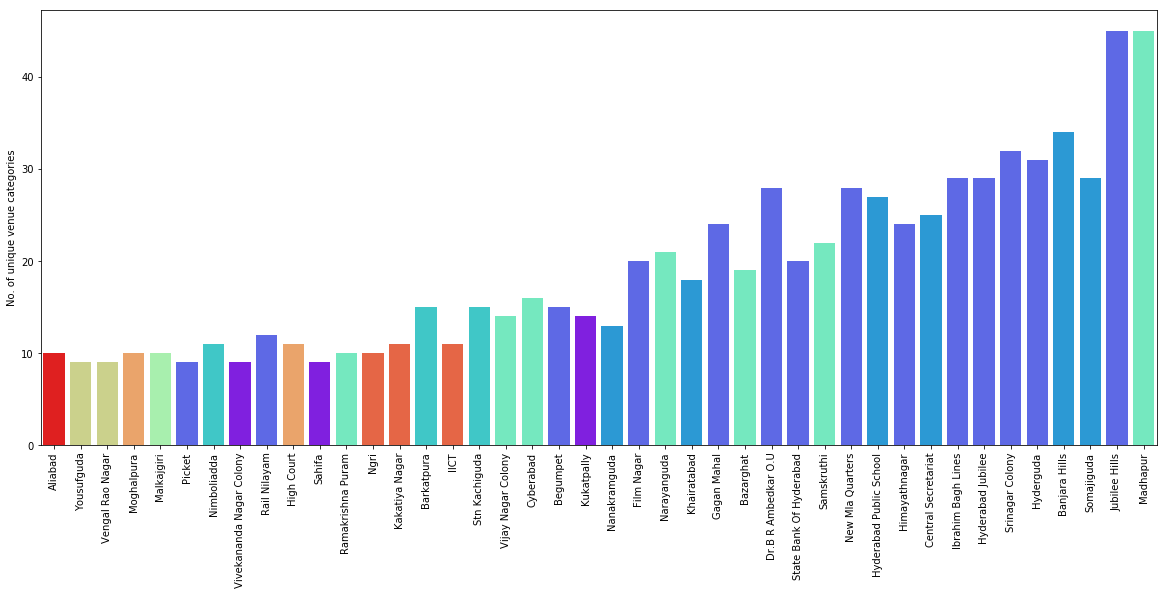

In [62]:
plt.figure(figsize=(20,8))
sns.barplot(x=final_names,y=y_values,palette = clr)
plt.ylabel('No. of unique venue categories')
plt.xticks(range(len(final_names)), final_names, rotation='vertical')
plt.show()

From the plot, we can conclude that clusters pertaining to **Jubilee Hills** and **Madhapur**,i.e. cluster number 2 and 5 respectively can definitely be considered the best clusters since they consist of neighborhoods with the highest number of amenities.

Calculate the number of **unique venues** in each neighborhood. This measure is indicative of how saturated a certain area is with respect to venues. It can be assumed that scope of success of a new venture would be less in a neighborhood already filled with a large number of venues.

In [63]:
y_values = []
for x in final_names:
    y_values.append(len(hyderabad_venues[hyderabad_venues['Neighborhood']==str(x)]['Venue'].unique()))

##### Plot the number of unique venues for every neighborhood
The barplot has been color encoded according to the cluster number. Thus, all bars(neighborhoods) with the same colors belong to the same neighborhood.

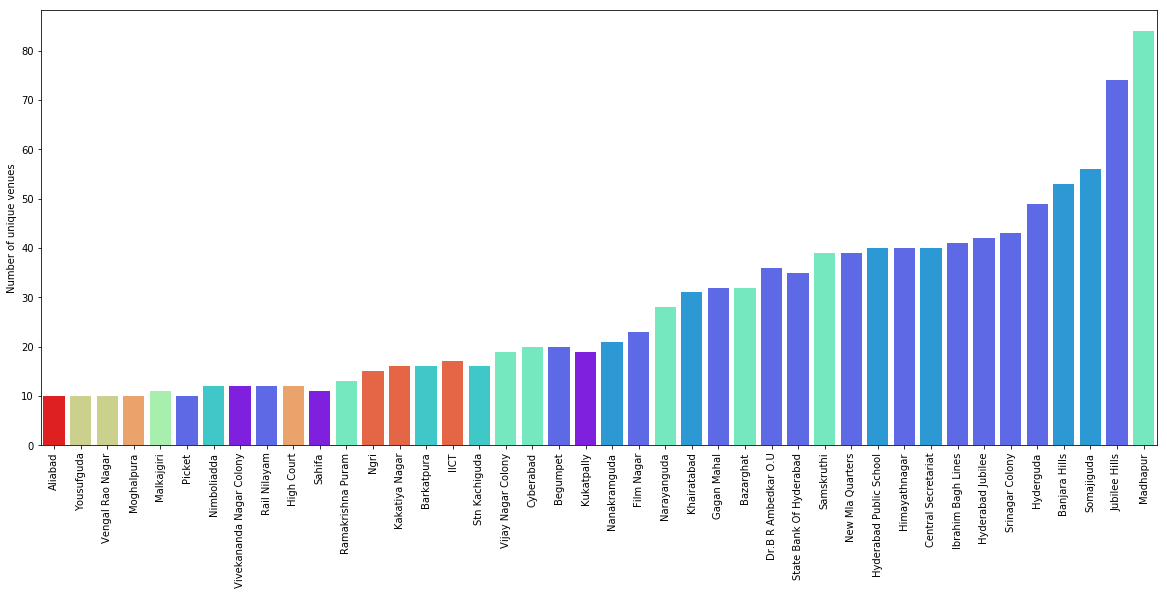

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.barplot(x=final_names,y=y_values,palette = clr)
plt.ylabel('Number of unique venues')
plt.xticks(range(len(final_names)), final_names, rotation='vertical')
plt.show()

#### Food-joints / Restaurants Analysis
We shall now send GET requests to the **Foursquare API** for getting response data pertaining to only venues related to food such as food-joints and restaurants (maximum = 100) within the vicinity (1000m radius from neighborhood) of the neighborhood. This data will then be further analysed to generate food-specific insights.

Define function to request Foursquare API to return **100 nearest venues related to food (within a 1000m radius)** from given neighborhood's latitude and longitude:

In [65]:
def getNearbyVenues(names, latitudes, longitudes, radius=1000):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}&section=food'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            100)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

Call function and create dataframe to store all relevant data from Foursqaure API's response pertaining to venues related to food near a neighborhood for each and every neighborhood

In [66]:
hyderabad_venues = pd.DataFrame()
hyderabad_venues = getNearbyVenues(names=df_final['name'],
                                   latitudes=df_final['latitude'],
                                   longitudes=df_final['longitude']
                                  )

Aliabad
Banjara Hills
Barkatpura
Bazarghat
Begumpet
Central Secretariat
Cyberabad
Dr.B R Ambedkar O.U
Film Nagar
Gagan Mahal
High Court
Himayathnagar
Hyderabad Jubilee
Hyderabad Public School
Hyderguda
IICT
Ibrahim Bagh Lines
Jubilee Hills
Kakatiya Nagar
Khairatabad
Kukatpally
Madhapur
Malkajgiri
Moghalpura
Nanakramguda
Narayanguda
New Mla Quarters
Ngri
Nimboliadda
Picket
Rail Nilayam
Ramakrishna Puram
Sahifa
Samskruthi
Somajiguda
Srinagar Colony
State Bank Of Hyderabad
Stn Kachiguda
Vengal Rao Nagar
Vijay Nagar Colony
Vivekananda Nagar Colony
Yousufguda


In [67]:
hyderabad_venues

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Aliabad,17.345630,78.472680,Hotel Shah Ghouse,17.347899,78.470986,Snack Place
1,Aliabad,17.345630,78.472680,Star Bawarche,17.347700,78.470613,Asian Restaurant
2,Aliabad,17.345630,78.472680,Lee's,17.346575,78.476291,Chinese Restaurant
3,Aliabad,17.345630,78.472680,Pizza & Burgers,17.342968,78.468934,Sandwich Place
4,Aliabad,17.345630,78.472680,Balaji Sri Kishan Mithai Bhandar,17.343762,78.468352,Restaurant
5,Aliabad,17.345630,78.472680,Lee's Chinese Restaurant,17.347883,78.466605,Chinese Restaurant
6,Aliabad,17.345630,78.472680,cafe needs,17.345678,78.479279,Café
7,Banjara Hills,17.417746,78.439901,Guilt Trip,17.417401,78.443219,Deli / Bodega
8,Banjara Hills,17.417746,78.439901,Ofen,17.415806,78.443039,Bakery
9,Banjara Hills,17.417746,78.439901,Cafe Cubano,17.416990,78.442824,Café


Calculate the number of **unique venue categories related to food** in each neighborhood

In [68]:
y_values = []
for x in final_names:
    y_values.append(len(hyderabad_venues[hyderabad_venues['Neighborhood']==str(x)]['Venue Category'].unique()))

##### Plot the number of unique venue categories related to food for every neighborhood
The barplot has been color encoded according to the cluster number. Thus, all bars(neighborhoods) with the same colors belong to the same neighborhood.

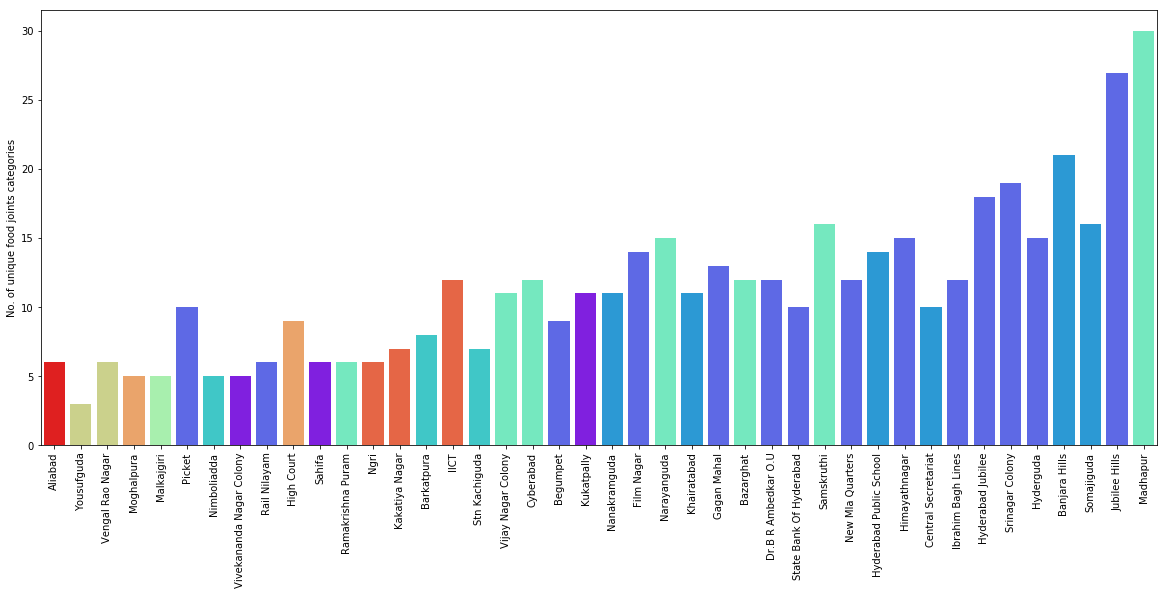

In [69]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.barplot(x=final_names,y=y_values,palette = clr)
plt.ylabel('No. of unique food joints categories')
plt.xticks(range(len(final_names)), final_names, rotation='vertical')
plt.show()

Calculate the number of **unique venues related to food** in each neighborhood

In [70]:
y_values = []
for x in final_names:
    y_values.append(len(hyderabad_venues[hyderabad_venues['Neighborhood']==str(x)]['Venue'].unique()))

##### Plot the number of unique venues related to food for every neighborhood
The barplot has been color encoded according to the cluster number. Thus, all bars(neighborhoods) with the same colors belong to the same neighborhood.

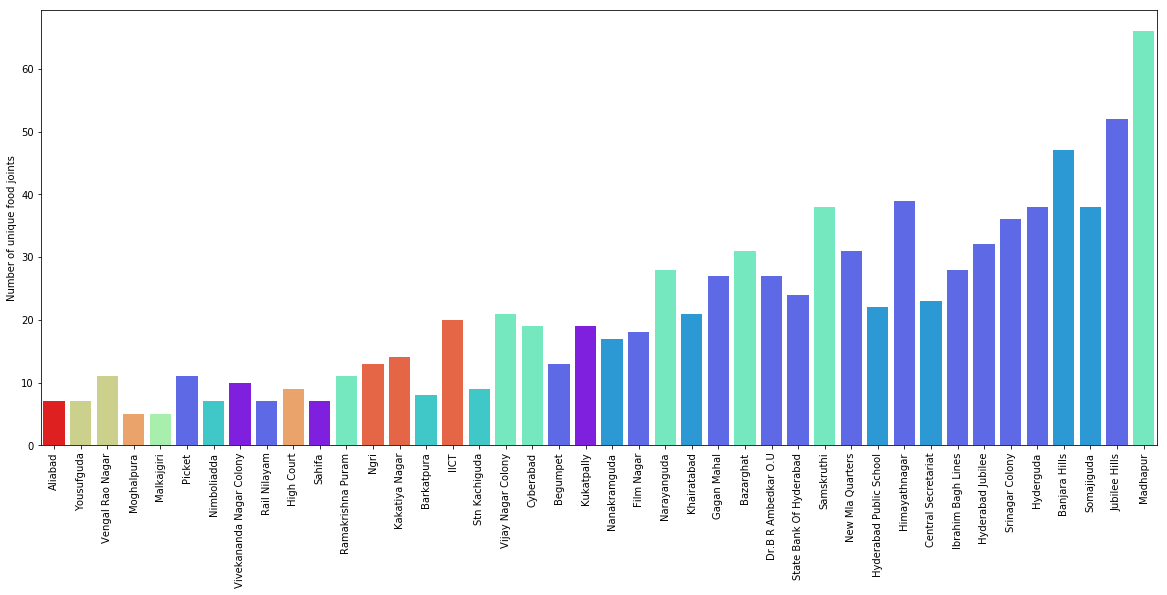

In [71]:
import seaborn as sns
import matplotlib.pyplot as plt
plt.figure(figsize=(20,8))
sns.barplot(x=final_names,y=y_values,palette = clr)
plt.ylabel('Number of unique food joints')
plt.xticks(range(len(final_names)), final_names, rotation='vertical')
plt.show()

## Results and Discussion <a name="results"></a>

Based on the barplot showing the **number of unique venue categories** for each neighborhood, we concluded that clusters pertaining to **Jubilee Hills** and **Madhapur**,i.e. cluster numbers 2 and 5 respectively can definitely be considered the best clusters since they consist of neighborhoods with the highest number of amenities. 

   Thus, prospective stakeholders would like to open up their restaurant in similar neighborhoods since they have the largest customer base and also have a huge demand. However, it is possible that these neighborhoods might be saturated with venues. Therefore, we also look at the plot showing the **number of unique venues** for each and every neighborhood. Here we see that the while the best neighborhoods in terms of amenities such as **Jubilee Hills, Banjara Hills, Madhapur etc** are saturated with a large number of venues, there exist neighborhoods which are part of the same cluster yet have lesser number of venues. These neighborhoods might be optimal for opening up restaurants since they fall to the same cluster and are therefore similar to neighborhoods with highest amenities yet have less number of venues.
    
   Instead of looking at the **total number of venues** of a certain neighborhood to determine the saturation, it would be better to simply look at the **total number of food joints / restaurants** in that neighborhood. Thus, we look at the barplot showing the number of unique venue categories pertaining to food for each neighborhood. We can see that our inital assumption is still correct and neighborhoods in cluster 2 and 5 have the highest variety of food joints are thereby considered the best neighborhoods.
   
   So the optimal location to open up restaurants in Hyderabad would be neigborhoods in the *best clusters*i.e. clusters 2 and 5 with the least number of existing food joints. The ideal candidate neighborhoods can be seen from the plot of **number of unique venues related to food** for every neighborhood. Here we see that the neighborhoods with the least number of foodjoints are:
   1. Rail Nilayam
   2. RamaKrishna Puram
   3. Picket
   4. Begumpet
   5. Cyberabad

## Conclusion <a name="conclusion"></a>

Purpose of this project was to identify areas/neighborhoods in Hyderabad close to the city-center with low number of restaurants in order to aid stakeholders in narrowing down the search for optimal location for opening of a food-joint/restaurant. By calculating venue density distribution from Foursquare data we have first identified general clusters that justify further analysis and created groups of similar neighborhoods, and then generated extensive visualizations to justify how good a certain cluster is based on characteristics(no. of amenities) of the neighborhoods in the clusters. 

Then the Foursquare data was again used in order to find venues pertaining to food for all the neighborhoods to determine the saturation of a neighborhood with respect to foodjoints. Optimal locations were identified as those neighborhoods which are part of the best clusters(having neighborhoods with maximum amenities) yet have the least number of food joints. The optimal locations obtained are:
  1. Rail Nilayam
  2. RamaKrishna Puram
  3. Picket
  4. Begumpet
  5. Cyberabad

Final decision on optimal restaurant location will be made by stakeholders based on specific characteristics of neighborhoods and their locations, taking into consideration additional factors like attractiveness of each location (proximity to park or water), levels of noise / proximity to major roads, real estate availability, prices, social and economic dynamics of every neighborhood etc.